Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.


**Logistic Function (Sigmoid Function):**

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20190522162153/sigmoid-function-300x138.png)

The sigmoid function is a mathematical function used to map the predicted values to probabilities, maps any real value into another value within a range of 0 and 1.

In logistic regression, we use the concept of the threshold value, which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.


Hypothesis => Z = WX + B

hΘ(x) = sigmoid (Z)

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTwcuWgMl6qQ8Flef1-bM0jwQyzqNGZiOjPwNRfpFX_WDIMgLm_&usqp=CAU)




![alt text](https://miro.medium.com/max/1096/1*i_QQvUzXCETJEelf4mLx8Q.png)

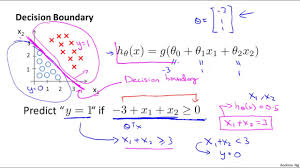

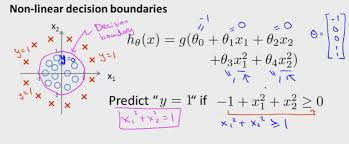

**Cost Function :** 

![alt text](https://miro.medium.com/max/996/1*TqZ9myxIdLuKNmt8orCeew.png)

linear can not be used for logistic because 
Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.

![alt text](https://miro.medium.com/max/926/1*ZyjEj3A_QyR4WY7y5cwIWQ.png)


**CostFunction Explanation**

![alt text](https://miro.medium.com/max/1400/1*5AYaGPV-gjYUf37d2IhgTQ.jpeg)

![alt text](https://miro.medium.com/max/1400/1*MFMIEUC_dobhJrRjGK7PBg.jpeg)



**Simplified cost fuction :**

![alt text](https://miro.medium.com/max/1400/1*ueEwU1dE0Yu-KpMJanf9AQ.png)

In [0]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Uttam580/Machine_learning/master/datasets./Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [60]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


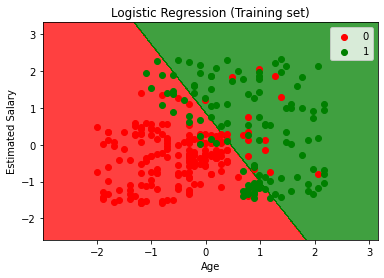

In [64]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


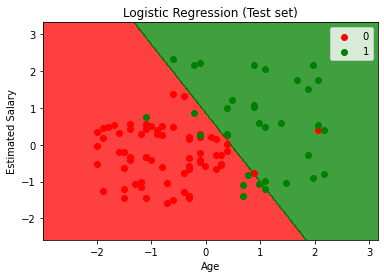

In [65]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Classification Metrics**

1. Confusion metrics


![alt text](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

1. True Positives (TP): True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True).

    Ex: The case where a person is actually having cancer(1) and the model classifying his case as cancer(1) comes under True positive.

2. True Negatives (TN): True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False).

    Ex: The case where a person NOT having cancer and the model classifying his case as Not cancer comes under True Negatives.

3. False Positives (FP): False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). False is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1).

    Ex: A person NOT having cancer and the model classifying his case as cancer comes under False Positives.

4. False Negatives (FN): False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False is because the model has predicted incorrectly and negative because the class predicted was a negative one. (0).

    Ex: A person having cancer and the model classifying his case as No-cancer comes under False Negatives


TO Remember 
![alt text](https://miro.medium.com/max/880/1*2lptVD05HarbzGKiZ44l5A.png)

**A.  Accuracy:**

Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made.

Accuracy = (TP+TN)/(TP+FN+FP+TN)

Accuracy is a good measure when the target variable classes in the data are nearly balanced.

**B. Precision**

![alt text](https://miro.medium.com/max/311/1*QRIZDkk_FffXKs_07ZlhZw.png)

Out of all the positive classes we have predicted correctly, how many are actually positive.

what proportion of patients that we diagnosed as having cancer, actually had cancer.


**C. Recall/Sensitivity** 

![alt text](https://miro.medium.com/max/308/1*BT3awaBdZHsit5s41LPb9A.png)

Out of all the positive classes, how much we predicted correctly. It should be high as possible.

 tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer. 

D. F -measure 

![alt text](https://miro.medium.com/max/716/1*98FaAKfPWo-EBTbjsxm4GA.png)

![alt text](https://miro.medium.com/max/1104/1*OpSYGh2-XE6aE3sVAJAHrw.png)

![alt text](https://miro.medium.com/max/552/1*uR09zTlPgIj5PvMYJZScVg.png)

In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [0]:

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [68]:
precision_score(y_test, y_pred)

0.8888888888888888

In [69]:
recall_score(y_test, y_pred)

0.75

In [70]:
f1_score(y_test, y_pred)

0.8135593220338982

In [80]:
probs = classifier.predict_proba(X_test)
probs[:10]# probablity for purchased and not purchased

array([[0.88725351, 0.11274649],
       [0.83324206, 0.16675794],
       [0.80549253, 0.19450747],
       [0.91056209, 0.08943791],
       [0.90253903, 0.09746097],
       [0.99212979, 0.00787021],
       [0.9848589 , 0.0151411 ],
       [0.26779092, 0.73220908],
       [0.99419108, 0.00580892],
       [0.49579544, 0.50420456]])

In [81]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [0]:
# y_pred is an array of predictions
def bestThresshold(y_true,y_pred):
    best_thresh = None
    best_score = 0
    for thresh in np.arange(0.1, 0.501, 0.01):
        score = f1_score(y_true, np.array(y_pred)>thresh)
        if score > best_score:
            best_thresh = thresh
            best_score = score
    return best_score , best_thresh

In [0]:
#bestThresshold(y_test,probs[:,1])

**2. Classification Report** 

The classification_report() function displays the precision, recall, f1-score and support for each class.



In [73]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



**3. ROC Curve**

It gives us the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.


![alt text](https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-3.png)


The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.

True positive rate = Recall = Sensitivity = true positive / (true positive + false negative)


False positive rate = 1 – specificity = false positive / (false positive + true negative)

We call the predict_proba method rather than predict in order to obtain a list of probabilities which represent the likelihood that a sample falls under a given category

In [0]:
# Plot Receiving Operating Characteristic Curve
# Create true and false positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])

In [90]:
 fpr[:10],tpr[:10],threshold[:10],

(array([0.        , 0.        , 0.        , 0.01470588, 0.01470588,
        0.04411765, 0.04411765, 0.05882353, 0.05882353, 0.10294118]),
 array([0.     , 0.03125, 0.1875 , 0.1875 , 0.75   , 0.75   , 0.8125 ,
        0.8125 , 0.84375, 0.84375]),
 array([1.99605114, 0.99605114, 0.98079763, 0.97751966, 0.54477712,
        0.50420456, 0.47516238, 0.46447968, 0.43703033, 0.4030711 ]))

In [77]:
roc_auc_score(y_test,probs[:,1])

0.9540441176470588

In [78]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9540441176470588

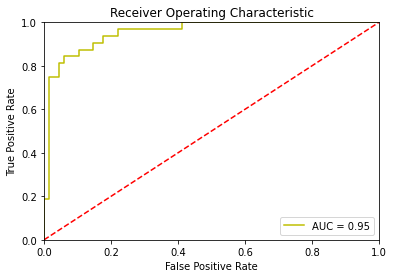

In [79]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()